##### Building RNN and DNN Model for Predicting Credit Card Frauds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cred = pd.read_csv('D:/Sem_2/Deep Learning/Datasets/creditcard_Mini-Project.csv')

In [3]:
cred.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
cred.shape

(284807, 31)

In [5]:
cred.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
cred.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
cred.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
cred['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

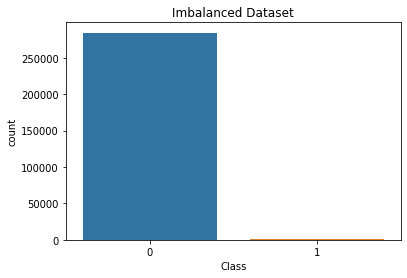

In [9]:
#Predictor Class Before Over-sampling
sns.countplot(x = 'Class', data = cred)
plt.title("Imbalanced Dataset")
plt.show()

In [10]:
X = cred.drop('Class', axis=1)
y = cred['Class']

In [11]:
#Spliting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state = 5)

In [12]:
#Balancing the dataset
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 388
Before OverSampling, counts of label '0': 227457 

After OverSampling, the shape of train_X: (454914, 30)
After OverSampling, the shape of train_y: (454914,) 

After OverSampling, counts of label '1': 227457
After OverSampling, counts of label '0': 227457


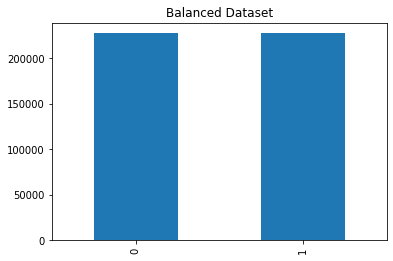

In [13]:
#Predictor Class After Over-sampling
pd.Series(y_train_res).value_counts().plot(kind="bar")
plt.title("Balanced Dataset")
plt.show()

In [14]:
#Building DNN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = keras.Sequential([Dense(input_dim = 30, units = 128, activation = "relu"), 
                          Dense(units= 64, activation = "relu"), Dropout(0.2), 
                          Dense(units= 32, activation = "relu"), Dropout(0.2),
                          Dense(units= 32, activation = "relu"), Dropout(0.2),
                          Dense(units= 16, activation = "relu"), Dropout(0.2),
                          Dense(units=1, activation = "sigmoid")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [ ]:
# Compiling and fiting the model
model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ['accuracy'])
history = model.fit(X_train_res, y_train_res, epochs=25, batch_size = 32, validation_data=(X_test, y_test),verbose=1)
print("Evaluate on test data")
score = model.evaluate(X_test, y_test)
print("test loss, test accuracy, test precision, test recall:", score)

Epoch 1/25
14217/14217 [==============================] - 39s 3ms/step - loss: 0.8264 - accuracy: 0.5215 - val_loss: 0.3272 - val_accuracy: 0.9875
Epoch 2/25
14217/14217 [==============================] - 29s 2ms/step - loss: 0.7403 - accuracy: 0.5842 - val_loss: 0.9369 - val_accuracy: 0.0217
Epoch 3/25
14217/14217 [==============================] - 29s 2ms/step - loss: 0.6426 - accuracy: 0.7069 - val_loss: 0.4116 - val_accuracy: 0.9107
Epoch 4/25
14217/14217 [==============================] - 29s 2ms/step - loss: 0.5541 - accuracy: 0.7826 - val_loss: 0.1239 - val_accuracy: 0.9507
Epoch 5/25
14217/14217 [==============================] - 29s 2ms/step - loss: 0.5053 - accuracy: 0.8244 - val_loss: 0.2251 - val_accuracy: 0.9292
Epoch 6/25
14217/14217 [==============================] - 29s 2ms/step - loss: 0.5311 - accuracy: 0.8342 - val_loss: 0.0346 - val_accuracy: 0.9833
Epoch 7/25
14217/14217 [==============================] - 30s 2ms/step - loss: 0.6099 - accuracy: 0.8381 - val_loss: 0

In [15]:
def display_models_plots(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'r', label='Training acc')
    plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

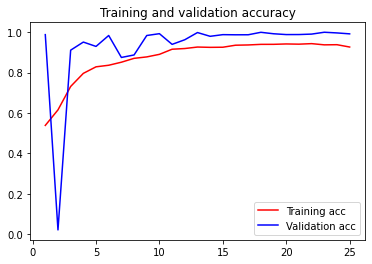

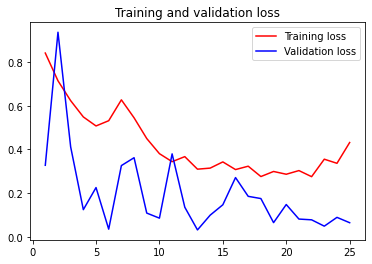

In [93]:
# Plotting the results
display_models_plots(history)

############################################################################################################################

In [16]:
#Preparing dataset for RNN model
cred_rnn = cred
cred_rnn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
cred_rnn['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

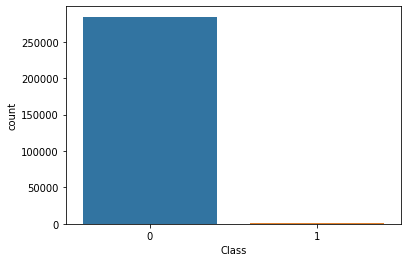

In [18]:
#Predictor Class Before Under-sampling
sns.countplot(x = 'Class', data = cred_rnn)
plt.show()

In [19]:
non_Fraud = cred_rnn[cred_rnn["Class"]==0]
Fraud = cred_rnn[cred_rnn["Class"]==1]

In [20]:
non_Fraud.shape, Fraud.shape

((284315, 31), (492, 31))

In [21]:
non_Fraud = non_Fraud.sample(Fraud.shape[0])
non_Fraud.shape

(492, 31)

In [22]:
cred_rnn= Fraud.append(non_Fraud, ignore_index=True) 
cred_rnn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [23]:
cred_rnn['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

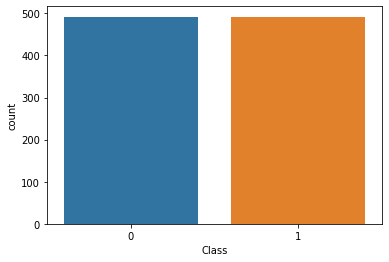

In [24]:
#Predictor Class After Under-sampling
sns.countplot(x = 'Class', data = cred_rnn)
plt.show()

In [25]:
cred_rnn.shape

(984, 31)

In [27]:
X_1 = cred_rnn.drop('Class', axis=1)
y_1 = cred_rnn['Class']

In [28]:
#Spliting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train_1,  X_test_1,  y_train_1, y_test_1 = train_test_split(X_1,  y_1, test_size=0.2, random_state = 5)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   #scaling of data
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1) #it avoid overfitting

In [30]:
y_train_1 = y_train_1.to_numpy()
y_test_1 = y_test_1.to_numpy() 

In [31]:
y_train_1.shape, y_test_1.shape

((787,), (197,))

In [32]:
X_train_1 = X_train_1.reshape(X_train_1.shape[0], X_train_1.shape[1],1) #reshape of pramater to convert into 3 dimensional since cnn during training uses uses 3D input
X_test_1 = X_test_1.reshape(X_test_1.shape[0], X_test_1.shape[1],1)

In [33]:
X_train_1.shape, X_test_1.shape

((787, 30, 1), (197, 30, 1))

In [34]:
#Building RNN model for the dataset
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from keras.layers import Input, Dense

In [37]:
from tensorflow.keras import Sequential
model_1= Sequential()
model_1.add(SimpleRNN(32,input_shape=X_train_1[0].shape, activation="relu"))
model_1.add(Dense(8,activation="relu"))
model_1.add(Dense(1))
model_1.compile(loss="binary_crossentropy", optimizer="rmsprop")
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compiling and fiting the model on test set
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train_1,y_train_1, epochs=25, validation_data=(X_test_1, y_test_1),verbose=1)
print("Evaluate on test data")
score = model.evaluate(X_test_1, y_test_1)
print("test loss, test accuracy, test precision, test recall:", score)

Epoch 1/25
25/25 [==============================] - 3s 29ms/step - loss: 0.2929 - accuracy: 0.9134 - val_loss: 0.2809 - val_accuracy: 0.9188
Epoch 2/25
25/25 [==============================] - 0s 11ms/step - loss: 0.2913 - accuracy: 0.9080 - val_loss: 0.2918 - val_accuracy: 0.9442
Epoch 3/25
25/25 [==============================] - 0s 12ms/step - loss: 0.2222 - accuracy: 0.9207 - val_loss: 0.4481 - val_accuracy: 0.9036
Epoch 4/25
25/25 [==============================] - 0s 12ms/step - loss: 0.4023 - accuracy: 0.8771 - val_loss: 0.2545 - val_accuracy: 0.9340
Epoch 5/25
25/25 [==============================] - 0s 15ms/step - loss: 0.1846 - accuracy: 0.9288 - val_loss: 0.3630 - val_accuracy: 0.9543
Epoch 6/25
25/25 [==============================] - 0s 11ms/step - loss: 0.3416 - accuracy: 0.9198 - val_loss: 0.2820 - val_accuracy: 0.9442
Epoch 7/25
25/25 [==============================] - 0s 11ms/step - loss: 0.2449 - accuracy: 0.9225 - val_loss: 0.3209 - val_accuracy: 0.9239
Epoch 8/25
25

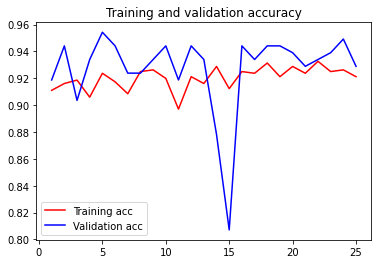

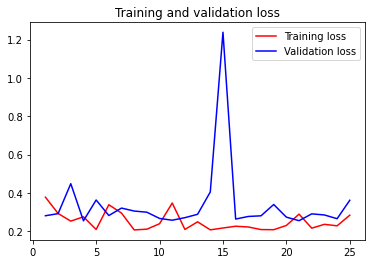

In [40]:
# Plotting the results
display_models_plots(history_1)